<a href="https://colab.research.google.com/github/joakimTI/JUMIA-PRODUCTS-RECOMMENDATION-AND-PRODUCT-REVIEW-SYSTEM/blob/Dorothy/index_with_narration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## JUMIA-PRODUCTS-RECOMMENDATION-AND-PRODUCT-REVIEW-SYSTEM

### Overview

The growth of e-commerce in Kenya has been exponential, with platforms like Jumia attracting large numbers of users. However, users frequently encounter challenges in locating relevant products due to expansive and sometimes disorganized product catalogs. Moreover, the limited use of recommendations and unreliable review systems further complicate the shopping experience, leading to reduced user satisfaction and lower conversion rates. To address these issues, we propose a recommendation and sentiment analysis system that leverages interaction history and user feedback. This system aims to provide more relevant recommendations and insights from customer sentiments, enabling Jumia to better serve its users and enhance its retail offerings.

### Problem Statement

The problem of finding relevant products on Jumia’s extensive catalog significantly affects customer satisfaction and conversion rates. Current limitations include:  

* Inadequate product recommendations based on user behavior, which leads to a lack of personalization.
* An unreliable rating and review system, leaving customers with limited insights into product quality.
* Limited retailer insights into customer sentiment, hindering their ability to refine offerings and optimize marketing strategies.
  
These issues reduce user satisfaction, decrease sales, and limit the potential for enhanced customer-retailer relationships on Jumia.

### Stakeholders

**Primary Users (Consumers)**: Customers who frequently shop on Jumia and need relevant recommendations to streamline their product search and improve purchase decisions.

**Retailers/Sellers**: Businesses and individual sellers on Jumia who seek insights into customer preferences and sentiment to better tailor their product offerings and marketing strategies.

**Jumia Management**: The platform administrators who aim to improve customer satisfaction, engagement, and conversion rates through improved site functionality.

### Objectives

* *Develop a Recommendation System*:

Create an intelligent recommendation engine that uses customer interaction history, preferences, and similar behavior patterns to provide relevant product recommendations.

* *Implement Sentiment Analysis*:

Extract sentiments from customer reviews to offer meaningful feedback, categorizing it as positive, negative, or neutral. This feedback will help refine recommendations and improve customer trust in the platform.

* *Enhance User Experience*:

Improve customer satisfaction by reducing the time and effort needed to find relevant products, potentially increasing conversion rates.

* *Provide Insightful Retailer Analytics*:

Equip sellers with sentiment analysis reports and recommendation patterns to refine product and marketing offerings based on customer preferences.

* *Support Kenyan E-commerce Growth*:

Contribute to the development of the e-commerce sector in Kenya by addressing key pain points in product discoverability and review reliability on Jumia.

### Expected Benefits

* **For Customers**: More personalized recommendations, improved trust through reliable sentiment analysis, and an overall enhanced shopping experience.

* **For Retailers**: Access to better customer insights and sentiment data, allowing them to optimize product listings, improve customer engagement, and refine marketing strategies.

* **For Jumia**: Increased user satisfaction and conversion rates, resulting in stronger brand loyalty and a more competitive edge in the Kenyan e-commerce market.

### Data Understanding

We scraped data from [jumia](https://www.jumia.co.ke/) which is an online shop with more than 15 categories of products but decided to only have 15 categories

### Exploratory Data Ananlysis

Importing relevant libraries

In [ ]:
#import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
from imblearn.over_sampling import SMOTE
from scipy import stats as stats
from imblearn.pipeline import Pipeline as imbpipe
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,\
roc_curve,roc_auc_score,classification_report, auc, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, OneHotEncoder
# from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from scipy import stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# import tensorflow as tf
# from tensorflow import keras
from scipy.sparse import csr_matrix
from sklearn.svm import SVC
from sklearn.exceptions import NotFittedError
from sklearn.naive_bayes import MultinomialNB
from sklearn.base import BaseEstimator, TransformerMixin
# from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
# from tensorflow import keras
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
#from surprise import SVD, Dataset, Reader
#from surprise.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

### Data Understanding

Loading the scraped dataset

In [ ]:
# Load the data into a dataframe and read the first five rows
df = pd.read_csv('/content/combined_dta.csv', encoding='ISO-8859-1')

df.head()

,web-scraper-order,web-scraper-start-url,product,product-href,product_name,image,price,brand,link,link-href,see_all,see_all-href,review_title,review,ratings,user_name,date,see_all_link,see_all_link-href,Category
0,1730407108-1,https://www.jumia.co.ke/computer-accessories/,Black Friday dealLaptop Skin Wrap Vinyl from 1...,https://www.jumia.co.ke/generic-laptop-skin-wr...,Laptop Skin Wrap Vinyl from 12-17.0 inches Lap...,https://ke.jumia.is/unsafe/fit-in/680x680/filt...,KSh 699 - KSh 797,NaN,NaN,https://www.jumia.co.ke/computer-accessories/?...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Computing
1,1730407112-2,https://www.jumia.co.ke/computer-accessories/,"Black Friday deal9""-17"" Laptop Cooling Stand P...",https://www.jumia.co.ke/9-17-laptop-cooling-st...,"9""-17"" Laptop Cooling Stand Pad",https://ke.jumia.is/unsafe/fit-in/680x680/filt...,"KSh 3,325",NaN,NaN,https://www.jumia.co.ke/computer-accessories/?...,See All,https://www.jumia.co.ke/catalog/productratings...,OKAY,"Working, feels cheap",3 out of 5,by WILFRED,28/04/2022,NaN,NaN,Computing
2,1730407112-3,https://www.jumia.co.ke/computer-accessories/,"Black Friday deal9""-17"" Laptop Cooling Stand P...",https://www.jumia.co.ke/9-17-laptop-cooling-st...,"9""-17"" Laptop Cooling Stand Pad",https://ke.jumia.is/unsafe/fit-in/680x680/filt...,"KSh 3,325",NaN,NaN,https://www.jumia.co.ke/computer-accessories/?...,See All,https://www.jumia.co.ke/catalog/productratings...,okay,A bit big for a regular laptop bag... The fanc...,4 out of 5,by Michael,8/7/2021,NaN,NaN,Computing
3,1730407114-4,https://www.jumia.co.ke/computer-accessories/,"Black Friday dealLexar 2.5"" SATA 256GB Laptop ...",https://www.jumia.co.ke/lexar-2.5-sata-256gb-l...,"Lexar 2.5"" SATA 256GB Laptop SSD",https://ke.jumia.is/unsafe/fit-in/680x680/filt...,"KSh 3,799",Lexar,NaN,https://www.jumia.co.ke/computer-accessories/?...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Computing
4,1730407116-5,https://www.jumia.co.ke/computer-accessories/,"WD External Portable Hard Drive-2TBKSh 15,000",https://www.jumia.co.ke/wd-external-portable-h...,WD External Portable Hard Drive-2TB,https://ke.jumia.is/unsafe/fit-in/680x680/filt...,"KSh 15,000",WD,NaN,https://www.jumia.co.ke/computer-accessories/?...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Computing


In [ ]:
# Get the number of rows and columns
print(df.shape, '\n')

print(f'The scraped data have {df.shape[0]} rows and {df.shape[1]} columns')

(51873, 20) 

The scraped data have 51873 rows and 20 columns




*   To arrive at this number of rows, as much data as possible both from the product categories and sub-categories was scraped.
*   The Jumia policy for data colection limited the data being scraped



In [ ]:
# Statistical summary

df.describe()

,web-scraper-order,web-scraper-start-url,product,product-href,product_name,image,price,brand,link,link-href,see_all,see_all-href,review_title,review,ratings,user_name,date,see_all_link,see_all_link-href,Category
count,51873,51873,51873,51873,51868,51739,51738,32293,24852,31760,34091,34085,31865,33864,31776,31776,31776,51,51,51872
unique,51566,220,22142,23289,19775,23223,7626,1188,35,625,104,6464,11015,21189,6,7938,1783,1,1,13
top,?web-scraper-order,https://www.jumia.co.ke/mobile-phones/,Black Friday dealOut of StockOfficial StoreHis...,https://www.jumia.co.ke/hisense-ax-3100g-3.1ch...,Hisense AX-3100G 3.1ch Dolby Atmos Home Cinema...,https://ke.jumia.is/unsafe/fit-in/680x680/filt...,KSh 999,Fashion,2,https://www.jumia.co.ke/mobile-phones/?page=2#...,See All,https://www.jumia.co.ke/catalog/productratings...,I like it,Good,5 out of 5,by Brian,28/10/2024,see_all_link,see_all_link-href,Fashion
freq,51,1448,192,192,192,192,463,10343,13250,488,31917,192,2934,259,18010,343,446,51,51,11684


The dataset contained strings, images, and numerical dtypes  
Strings
*   web-scraper-order- this was the data of the scraping structure. This was not vital to the analysis and would be dropped.
*   web-scraper-start-url- this was the data of the scraping structure. This was not vital to the analysis and would be dropped.
*   product
*   product-href
*   product_name
*   link
*   link_href
*   see_all
*   see_all_href
*   Image URL
*   Review_title
*   username
*   see_all_link
*   see_all_link_href
*   category
Datetime
Int: Priice and rating













In [ ]:
# Let's look at the data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51873 entries, 0 to 51872
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   web-scraper-order      51873 non-null  object
 1   web-scraper-start-url  51873 non-null  object
 2   product                51873 non-null  object
 3   product-href           51873 non-null  object
 4   product_name           51868 non-null  object
 5   image                  51739 non-null  object
 6   price                  51738 non-null  object
 7   brand                  32293 non-null  object
 8   link                   24852 non-null  object
 9   link-href              31760 non-null  object
 10  see_all                34091 non-null  object
 11  see_all-href           34085 non-null  object
 12  review_title           31865 non-null  object
 13  review                 33864 non-null  object
 14  ratings                31776 non-null  object
 15  user_name          

All features are of dtype object.  There are a total of 51873 rows and 20 columns.  This is not a complete dataset, there are missing values in most of the features  with the links having the most missing values. This is a moderately large dataset with a memory usage of 7.9 mbs.

In [ ]:
print(f'We have {df.shape[1]} columns in our dataset', '\n')

print('The columns are:')

df.columns

We have 20 columns in our dataset 

The columns are:


Index(['web-scraper-order', 'web-scraper-start-url', 'product', 'product-href',
       'product_name', 'image', 'price', 'brand', 'link', 'link-href',
       'see_all', 'see_all-href', 'review_title', 'review', 'ratings',
       'user_name', 'date', 'see_all_link', 'see_all_link-href', 'Category'],
      dtype='object')

To have better understanding of what each column entails and what they mean, have a look at the `column_description.txt` file in the `Data` folder

### Data Cleaning

In [ ]:
# Checks for row duplicates
df.duplicated().sum()

53

In [ ]:
# Remove row duplicates
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [ ]:
print(f'After dropping the 49 rows with duplicates, we now remaining with {df.shape[0]} rows and {df.shape[1]} columns')

After dropping the 49 rows with duplicates, we now remaining with 51820 rows and 20 columns


In [ ]:
# Function to calculate the percentage of null values in every column

def null_percentages(df):

    # Calculate the number of missing values and their percentage
    null_values = df.isnull().sum()
    null_percentage = (null_values / df.shape[0]) * 100

    # Create a DataFrame with the results
    missing_data = pd.DataFrame({'Null Values': null_values, 'Percentage': null_percentage})

    # Filter out columns with no missing values and sort by 'Missing Values'
    missing_data = missing_data[missing_data['Null Values'] > 0].sort_values(by='Null Values', ascending=False)

    return missing_data

In [ ]:
null_percentages(df)

,Null Values,Percentage
see_all_link,51818,99.996140
see_all_link-href,51818,99.996140
link,27021,52.143960
link-href,20109,38.805481
ratings,20093,38.774604
user_name,20093,38.774604
date,20093,38.774604
review_title,20004,38.602856
brand,19580,37.784639
review,18005,34.745272


 The above analysis shows the magnitude of missing values.  The study dealt with missing values majorly by imputing to reatin as much data as possible


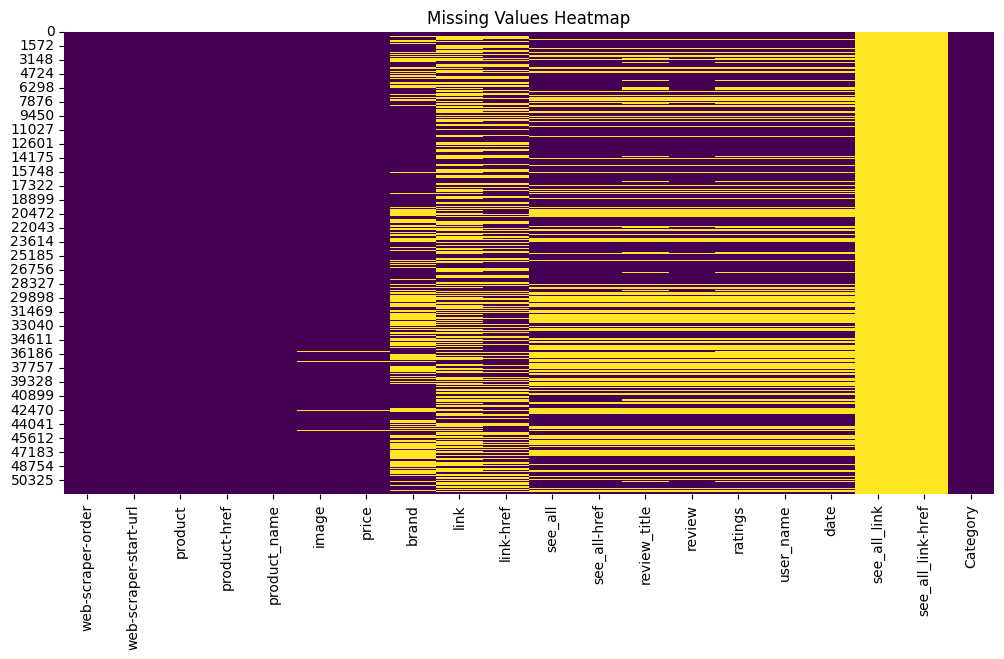

In [ ]:
# Plot missing values as a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show();

The visualization helped to identify:

* Which columns needed further data cleaning
* Missing data patterns that might indicate scraping issues
* Columns that needed dropping or imputation
* Potential systematic issues in data collection

In [ ]:
df.drop(['see_all_link-href', 'see_all_link', 'see_all-href', 'see_all', 'link-href', 'link'], axis=1, inplace=True,)
df.shape

(51820, 14)

The links that helped scrap the data were not useful anymore, hence dropped.
The dataset remained with 14  features.


In [ ]:
# Extract ratings, sub_category, overall_ratings, date, month, year and ratings_count

df['ratings'] = df['ratings'].str.extract(r'(\d+)').astype(float)

df['sub_category'] = df['web-scraper-start-url'].str.extract(r'\.ke/([^/]+)/')

# Step 1: Extract initial rating
df['overall_ratings'] = df['product'].str.extract(r'(\d+\.\d+|\d+)\s*out of 5')[0].astype(float)

# Step 2: Correct ratings above 5.0 by extracting the last segment of the number
df['overall_ratings'] = df['overall_ratings'].apply(lambda x: float(str(x).split('.')[0][-1] + '.' + str(x).split('.')[-1]) if x > 5.0 else x)

df['ratings_count'] = df['product'].str.extract(r'(\d+) out of 5\((\d+)\)')[1].astype(float)

 More information on **rating** was gotten from the **ratings** feature,
 **sub_category** from `web-scraper-start-url` feature, **overall_ratings** from **product** feature and **rating_count** from **product** feature

In [ ]:
# Stripping 'by' from user_name

df['user_name'] = df['user_name'].str.lstrip('by')

In [ ]:
# Function to remove the currency and calculate the average of the price range

def convert_price(price):
    # Remove non-numeric characters (i.e.currency symbols)
    cleaned_price = re.sub(r"[^\d.-]", "", str(price))

    # Handle ranges
    if '-' in cleaned_price:
        try:
            low, high = map(float, cleaned_price.split('-'))
            return (low + high) / 2
        except ValueError:
            return None  # Return None if conversion fails
    else:
        try:
            return float(cleaned_price)  # Convert single prices to float
        except ValueError:
            return None

In [ ]:
# Apply the conversion function to the price column

df['price'] = df['price'].apply(convert_price)

In [ ]:
# Show the first 5 rows of the DataFrame

df.head()

,web-scraper-order,web-scraper-start-url,product,product-href,product_name,image,price,brand,review_title,review,ratings,user_name,date,Category,sub_category,overall_ratings,ratings_count
0,1730407108-1,https://www.jumia.co.ke/computer-accessories/,Black Friday dealLaptop Skin Wrap Vinyl from 1...,https://www.jumia.co.ke/generic-laptop-skin-wr...,Laptop Skin Wrap Vinyl from 12-17.0 inches Lap...,https://ke.jumia.is/unsafe/fit-in/680x680/filt...,748.0,NaN,NaN,NaN,NaN,NaN,NaN,Computing,computer-accessories,NaN,NaN
1,1730407112-2,https://www.jumia.co.ke/computer-accessories/,"Black Friday deal9""-17"" Laptop Cooling Stand P...",https://www.jumia.co.ke/9-17-laptop-cooling-st...,"9""-17"" Laptop Cooling Stand Pad",https://ke.jumia.is/unsafe/fit-in/680x680/filt...,3325.0,NaN,OKAY,"Working, feels cheap",3.0,WILFRED,28/04/2022,Computing,computer-accessories,4.1,7.0
2,1730407112-3,https://www.jumia.co.ke/computer-accessories/,"Black Friday deal9""-17"" Laptop Cooling Stand P...",https://www.jumia.co.ke/9-17-laptop-cooling-st...,"9""-17"" Laptop Cooling Stand Pad",https://ke.jumia.is/unsafe/fit-in/680x680/filt...,3325.0,NaN,okay,A bit big for a regular laptop bag... The fanc...,4.0,Michael,8/7/2021,Computing,computer-accessories,4.1,7.0
3,1730407114-4,https://www.jumia.co.ke/computer-accessories/,"Black Friday dealLexar 2.5"" SATA 256GB Laptop ...",https://www.jumia.co.ke/lexar-2.5-sata-256gb-l...,"Lexar 2.5"" SATA 256GB Laptop SSD",https://ke.jumia.is/unsafe/fit-in/680x680/filt...,3799.0,Lexar,NaN,NaN,NaN,NaN,NaN,Computing,computer-accessories,NaN,NaN
4,1730407116-5,https://www.jumia.co.ke/computer-accessories/,"WD External Portable Hard Drive-2TBKSh 15,000",https://www.jumia.co.ke/wd-external-portable-h...,WD External Portable Hard Drive-2TB,https://ke.jumia.is/unsafe/fit-in/680x680/filt...,15000.0,WD,NaN,NaN,NaN,NaN,NaN,Computing,computer-accessories,NaN,NaN


In [ ]:
print(f'We have {df.shape[0]} rows and {df.shape[1]} columns after extraction and addition of new columns')

We have 51820 rows and 17 columns after extraction and addition of new columns


In [ ]:
# removing columns that are no longer useful
df.drop(['web-scraper-start-url', 'product', 'product-href', 'date'], axis=1, inplace=True)

#### Imputation

In [1]:
# Impute less critical columns

df['brand'].fillna('Unknown', inplace=True)
df['review_title'].fillna('No Title', inplace=True)
df['user_name'].fillna('No name', inplace=True)
df['ratings'].fillna(0, inplace=True)
df['ratings_count'].fillna(0, inplace=True)

NameError: name 'df' is not defined

In [ ]:
# Drop the remaining negligible null values

df = df.dropna()

In [ ]:
null_percentages(df)

,Null Values,Percentage


In [ ]:
df.shape

(33211, 13)

### Exploratory Data Analysis

#### *Category Distribution*

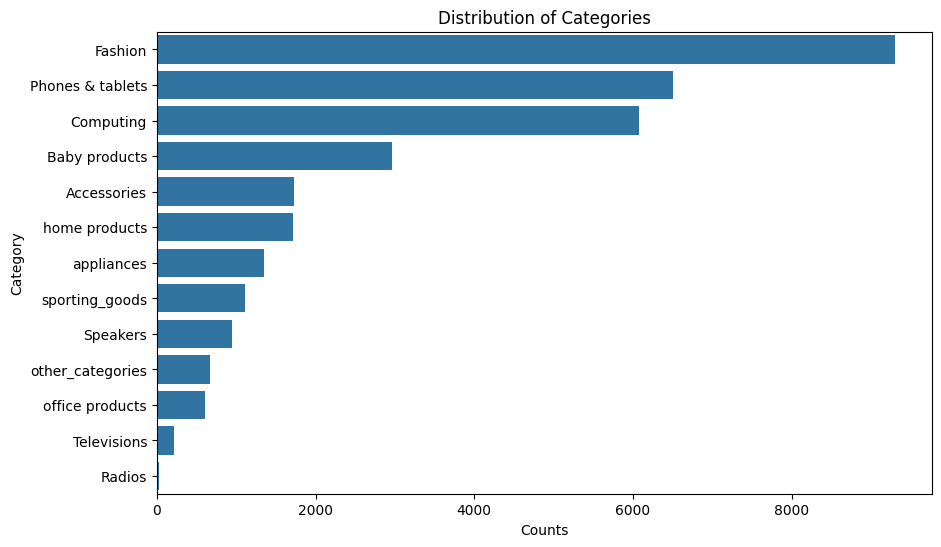

In [ ]:
# Categorical column
plt.figure(figsize=(10, 6))
sns.countplot(y='Category',
              data=df,
              order=df['Category'].value_counts().index)
plt.title('Distribution of Categories')
plt.xlabel('Counts')
plt.ylabel('Category')
plt.show();

**Interpretation**

- The top few categories have significantly more products compared to those at the bottom, suggesting that certain categories (like `Fashion` and `Phone & tablets`) are highly populated in the dataset.  
- There’s a clear drop-off in frequency as you move down the list, which could indicate that some categories are more popular or that more products have been uploaded for those categories in the e-commerce catalog.

**Insights**

* *Customer Interest*: The top categories could reflect higher customer interest or demand, as vendors may upload more products in these areas.

* *Inventory Planning*: Retailers might focus more on stocking and promoting items in the most frequent categories.
* *Recommendation System Focus*: A recommendation system might prioritize building recommendations for these popular categories since they are likely to have more diverse options.

#### *Prices Distribution*

In [ ]:
# Distribution Analysis
def plot_distribution(data, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    sns.histplot(data, bins=20)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show();

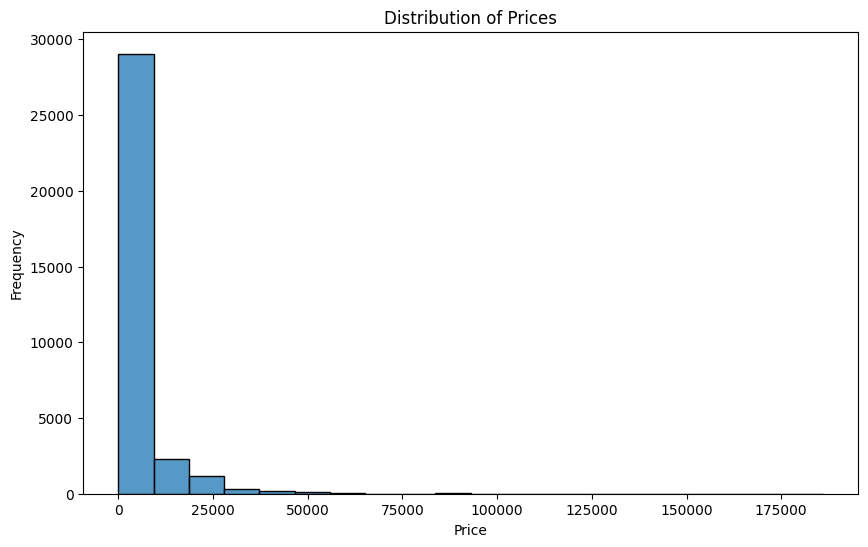

In [ ]:
plot_distribution(df['price'], 'Distribution of Prices', 'Price', 'Frequency')

**Interpretation and Possible Implications**:

* The price feature is highly imbalanced.  This can cause bias  towards tthe dominant categories in the recommendation system.  It could indicate a high customer demand for the dominant category, or it could reflect an inventory or data collection bias where most of the available products fall under this single category.

According to literature, this kind of skewed distribution is common in datasets where one category or product type is significantly more popular or frequently added than others.

In [ ]:
# Since price is positively skewed,

# Calculate IQR to detect outliers
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
threshold = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[df['price'] > threshold]

print("Number of outliers:", len(outliers))
print(outliers[['product_name', 'price']].sort_values(by='price', ascending=False))

Number of outliers: 5674
                                            product_name     price
42858  LG 75UP7760 75" UHD 4K HDR WebOS Smart AI Thin...  186000.0
50079  Ramtons RF/265 - 527L Side By Side LED Fridge ...  149300.0
50080  Ramtons RF/265 - 527L Side By Side LED Fridge ...  149300.0
49934  Samsung RT31K3082S8 - Top Freezer Refrigerator...   93999.0
51057  Ramtons RW/153- 12KG Front Load Washing Machin...   93500.0
...                                                  ...       ...
51218  Sokany 4500WTT-Heavy Duty Commercial Juicer Bl...    5698.0
51217  Sokany 4500WTT-Heavy Duty Commercial Juicer Bl...    5698.0
51216  Sokany 4500WTT-Heavy Duty Commercial Juicer Bl...    5698.0
51215  Sokany 4500WTT-Heavy Duty Commercial Juicer Bl...    5698.0
51213  Sokany 4500WTT-Heavy Duty Commercial Juicer Bl...    5698.0

[5674 rows x 2 columns]


There were 5674 outliers. However, these values are useful in the dataset and while deploying hance were not removed.

#### *Top 10 Sub Categories*

In [ ]:
# Analyze the distribution of items across different subcategories

subcategory_counts = df['sub_category'].value_counts()

subcategory_counts

,count
sub_category,
mobile-accessories,1806
mobile-phones,1382
smartphones,1099
computer-accessories,838
audio-video-accessories,806
...,...
sports-nutrition-testosterone-boosters,2
baby-bath-toys,2
compact-radios-stereos-boomboxes,2


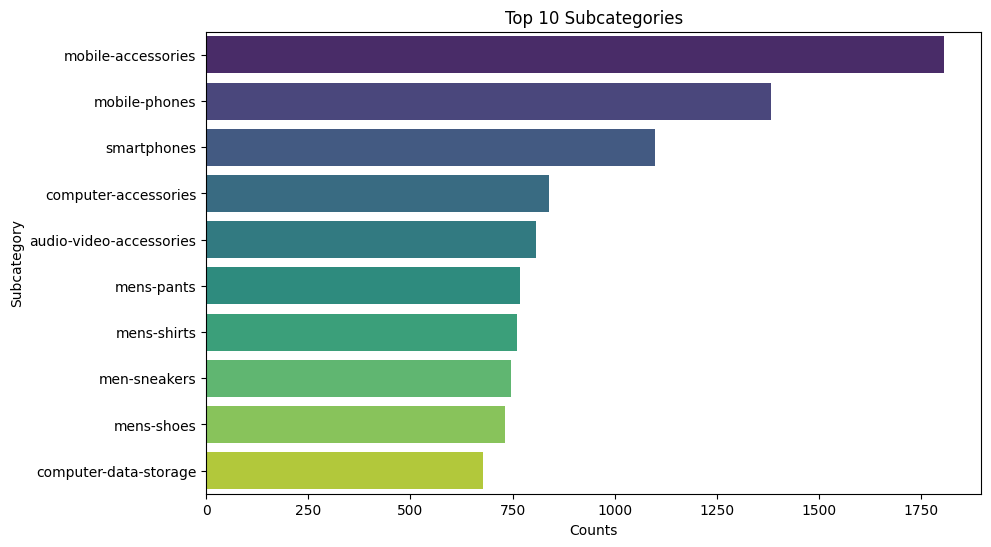

In [ ]:
# Get the top 10 subcategories in descending order
top_10_subcategories = subcategory_counts.head(10)

# Plot the horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_subcategories.values, y=top_10_subcategories.index, palette='viridis')
plt.title('Top 10 Subcategories')
plt.xlabel('Counts')
plt.ylabel('Subcategory')
plt.show();

**Potential Insights**

* *Customer Interest or Inventory Focus*: the top subcategories likely represent popular product types, high customer demand, or a focus on certain items. It is notable that mean wear were among the to 10 categories.

#### *Bottom 10 Sub Categories*

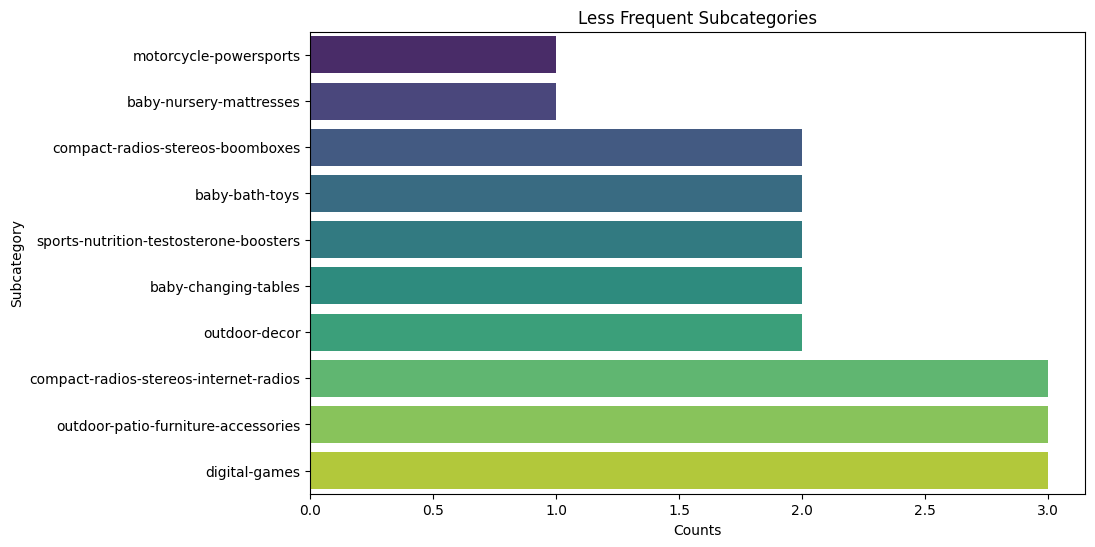

In [ ]:
# Get the top 10 subcategories in descending order and then reverse them for ascending order
bottom_10_subcategories = subcategory_counts.tail(10).iloc[::-1]

# Plot the horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=bottom_10_subcategories.values, y=bottom_10_subcategories.index, palette='viridis')
plt.title('Less Frequent Subcategories')
plt.xlabel('Counts')
plt.ylabel('Subcategory')
plt.show();

The above plot shows less frequent sub-categories potentially indicating lower popularity or inventory for these items. Men motocycle wear products are least bought. Baby products are not very popular.

#### *Users*

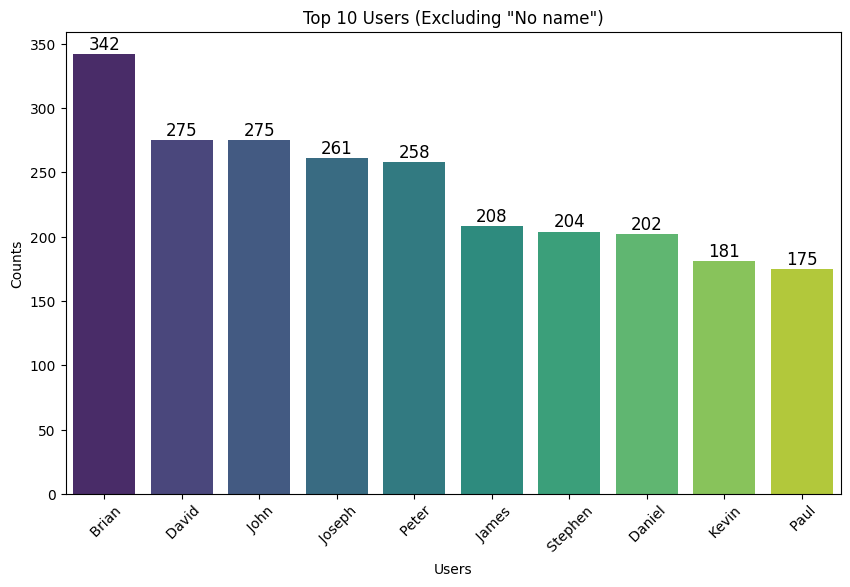

In [ ]:
# Filter out 'No name' entries from the user_name column
filtered_users = df[df['user_name'] != 'No name']

# Get the top 10 users by count
top_10_users = filtered_users['user_name'].value_counts().head(10)

# Plot the vertical bar chart for the top 10 users
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_10_users.index, y=top_10_users.values, palette='viridis')
# Annotate the bars with the count values
for i, value in enumerate(top_10_users.values):
    ax.text(i, value + 0.5, str(value), ha='center', va='bottom', fontsize=12)
plt.title('Top 10 Users (Excluding "No name")')
plt.xlabel('Users')
plt.ylabel('Counts')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.show();

**User Engagement**:

The bar plot shows very interesting results. Its clear that Brians are popular in every Kenyan sector i.e. including purchasing products online while  providing feedback on products. From the data, they provided feedback 342 times.  It is also noted that men are leading in product reviews.

#### *Ratings*

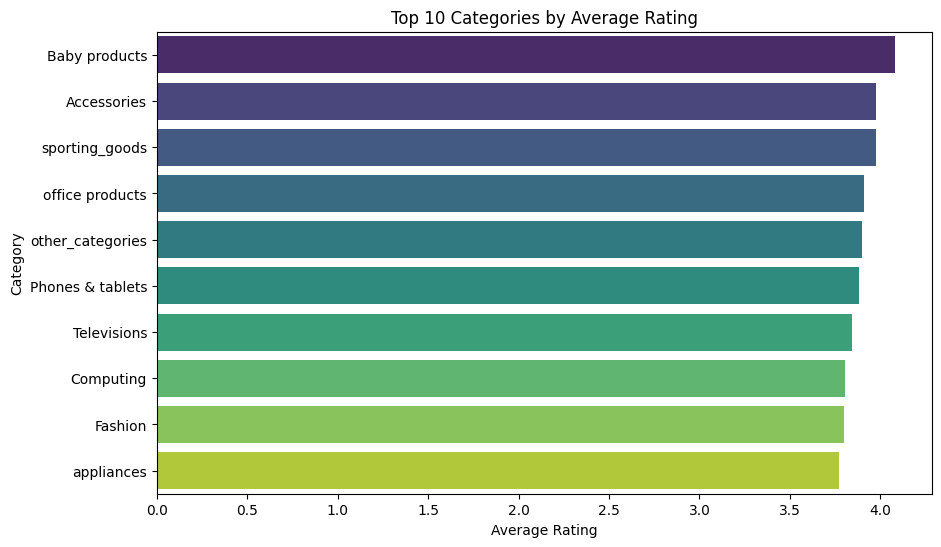

In [ ]:
# Calculate the average rating for each category
category_average_ratings = df.groupby('Category')['ratings'].mean()

# Sort the categories by average rating and get the top 10
ratings = category_average_ratings.sort_values(ascending=False).head(10)
# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x=ratings.values, y=ratings.index, palette='viridis')
plt.title('Top 10 Categories by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Category')
plt.show();

**Highest-Rated Category**: The first bar, `Baby products` followed closed by `Accessories`, represents the categories with the highest average rating. This suggests that customers are most satisfied with products in these categories, which might indicate superior product quality or customer satisfaction in those categories.
However, baby products had a smaller population and might have influenced the mean.

#### *Rating Count*

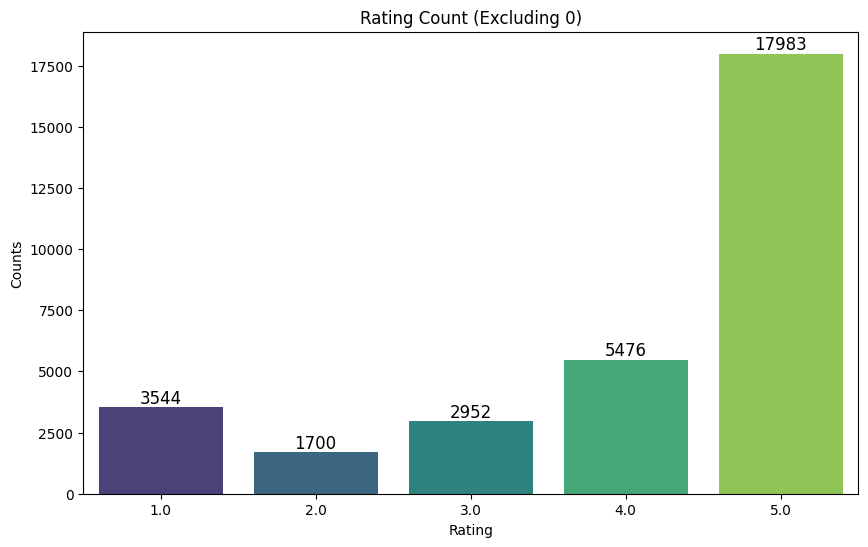

In [ ]:
# Filter out ratings of 0
filtered_ratings = df[df['ratings'] > 0]['ratings'].value_counts().sort_index()

# Plot vertical bar chart for filtered ratings count
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=filtered_ratings.index, y=filtered_ratings.values, palette='viridis')

# Annotate the bars with the count values
for i, value in enumerate(filtered_ratings.values):
    ax.text(i, value + 0.5, str(value), ha='center', va='bottom', fontsize=12)

plt.title('Rating Count (Excluding 0)')
plt.xlabel('Rating')
plt.ylabel('Counts')
plt.show();

From the above plot, we can see that **5** is the most rating used by the website users followed by **4** which is a clear indication majority of the products are satisfying and pleasing to the buyers.

#### *Price vs Ratings*

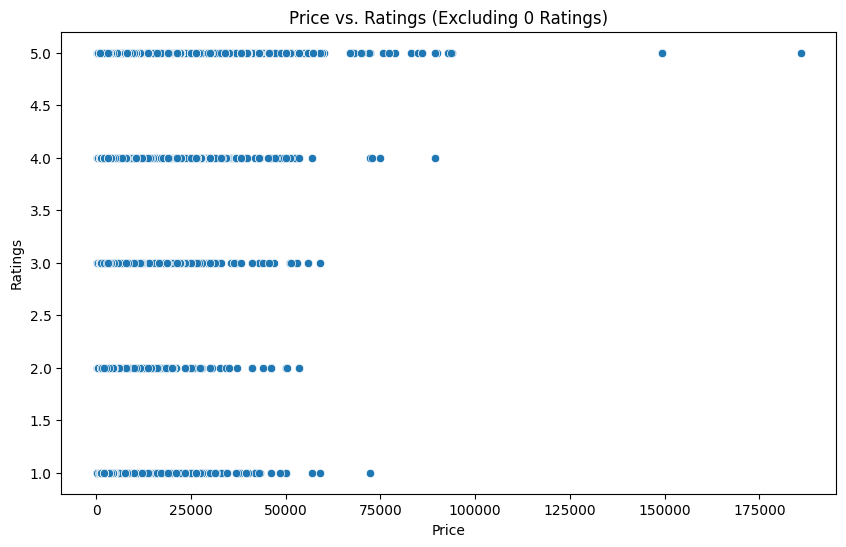

In [ ]:
# Filter out rows where ratings are 0
filtered_df = df[df['ratings'] > 0]

# Scatter plot of price vs. ratings (excluding 0 ratings)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=filtered_df['price'], y=filtered_df['ratings'])
plt.title('Price vs. Ratings (Excluding 0 Ratings)')
plt.xlabel('Price')
plt.ylabel('Ratings')
plt.show();

This scatter plot shows that:

* Products have a broad range of prices for each rating level.
* Higher ratings (3 to 5) are more frequent than lower ratings (1 or 2).
* There’s no direct correlation between price and rating based on this visual impliying that price alone does not determine user satisfaction.

#### *Product branding*

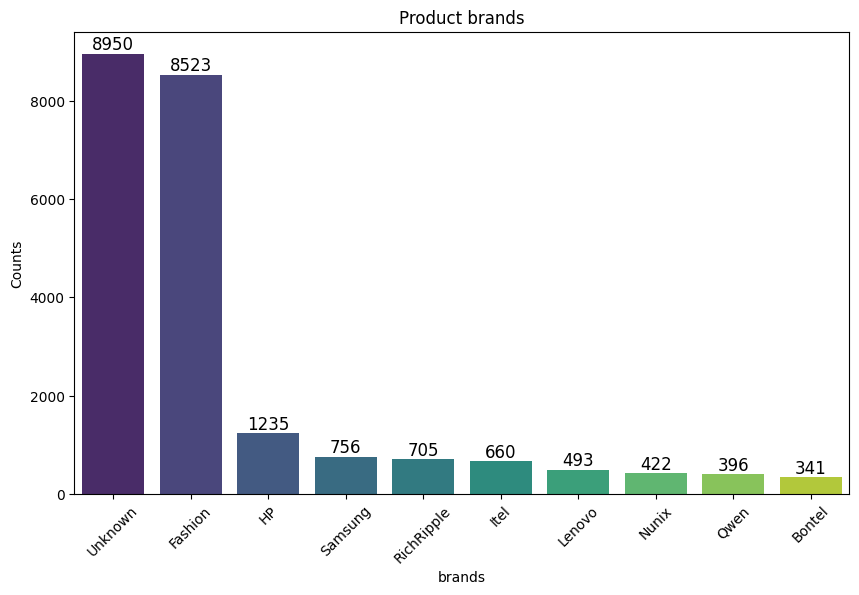

In [ ]:
# Get the product branding by count
product_brands = df['brand'].value_counts().head(10)

# Plot the vertical bar chart for the product branding
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=product_brands.index, y=product_brands.values, palette='viridis')
# Annotate the bars with the count values
for i, value in enumerate(product_brands.values):
    ax.text(i, value + 0.5, str(value), ha='center', va='bottom', fontsize=12)
plt.title('Product brands')
plt.xlabel('brands')
plt.ylabel('Counts')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.show();

From the above output, it is evident that majority of product's brands are not indicated in the Jumia website but for best analytical visualization we collectively gave the product's brand placeholder `Uknown`. Most of the `Fashion` seems to be branded.

Note: Product's branding in the website that would help site users in knowing the product brands.

#### *Frequently Listed Products*

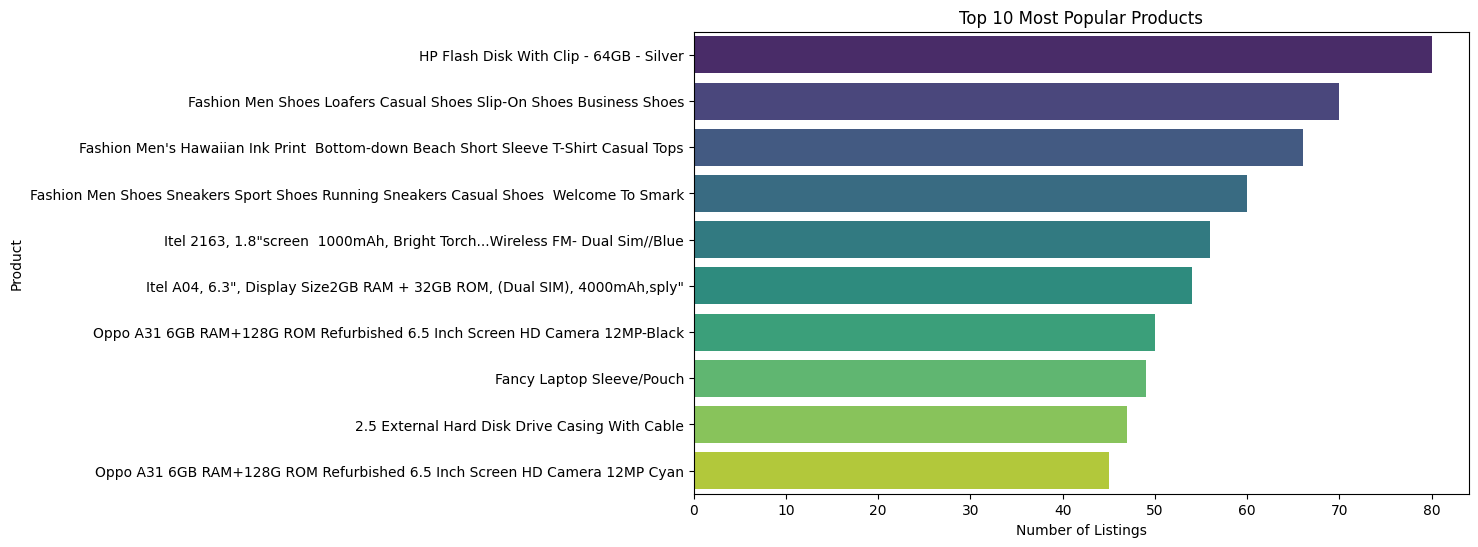

In [ ]:
# Analyzing the most frequently listed products
plt.figure(figsize=(10, 6))
top_products = df['product_name'].value_counts().head(10)
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
plt.title('Top 10 Most Popular Products')
plt.xlabel('Number of Listings')
plt.ylabel('Product')
plt.show();

**Insights**:

* Top Product: The product with the longest bar is the most popular, possibly indicating it is a bestseller or highly favored among customers.
* Less Popular Products: The products with shorter bars are less popular, which might indicate lower sales or reduced customer preference.

### Data Preprocessing

In [ ]:
df.head()

,web-scraper-order,product_name,image,price,brand,review_title,review,ratings,user_name,Category,sub_category,overall_ratings,ratings_count
1,1730407112-2,"9""-17"" Laptop Cooling Stand Pad",https://ke.jumia.is/unsafe/fit-in/680x680/filt...,3325.0,Unknown,OKAY,"Working, feels cheap",3.0,WILFRED,Computing,computer-accessories,4.1,7.0
2,1730407112-3,"9""-17"" Laptop Cooling Stand Pad",https://ke.jumia.is/unsafe/fit-in/680x680/filt...,3325.0,Unknown,okay,A bit big for a regular laptop bag... The fanc...,4.0,Michael,Computing,computer-accessories,4.1,7.0
29,1730407173-30,Toshiba High Speed Micro SD Memory Card,https://ke.jumia.is/unsafe/fit-in/680x680/filt...,803.0,Toshiba,good,genuine,4.0,your name,Computing,computer-accessories,4.7,3.0
30,1730407177-31,Lenovo Laptop Charger For Lenovo ThinkPad Yoga...,https://ke.jumia.is/unsafe/fit-in/680x680/filt...,4157.0,Lenovo,I like it,It worked out well,1.0,Bathsheba,Computing,computer-accessories,4.0,4.0
37,1730407197-38,"Safaricom, Airtel & Telkom -4G/3G Universal Modem",https://ke.jumia.is/unsafe/fit-in/680x680/filt...,2600.0,Unknown,Works well,So far so good...,5.0,Ngarachu,Computing,computer-accessories,3.7,86.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33211 entries, 1 to 51871
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   web-scraper-order  33211 non-null  object 
 1   product_name       33211 non-null  object 
 2   image              33211 non-null  object 
 3   price              33211 non-null  float64
 4   brand              33211 non-null  object 
 5   review_title       33211 non-null  object 
 6   review             33211 non-null  object 
 7   ratings            33211 non-null  float64
 8   user_name          33211 non-null  object 
 9   Category           33211 non-null  object 
 10  sub_category       33211 non-null  object 
 11  overall_ratings    33211 non-null  float64
 12  ratings_count      33211 non-null  float64
dtypes: float64(4), object(9)
memory usage: 3.5+ MB


In [ ]:
df1 = df.copy()

df1.drop(['web-scraper-order', 'image', 'review_title', 'overall_ratings', 'ratings_count'], axis=1, inplace=True)

df1.head()

,product_name,price,brand,review,ratings,user_name,Category,sub_category
1,"9""-17"" Laptop Cooling Stand Pad",3325.0,Unknown,"Working, feels cheap",3.0,WILFRED,Computing,computer-accessories
2,"9""-17"" Laptop Cooling Stand Pad",3325.0,Unknown,A bit big for a regular laptop bag... The fanc...,4.0,Michael,Computing,computer-accessories
29,Toshiba High Speed Micro SD Memory Card,803.0,Toshiba,genuine,4.0,your name,Computing,computer-accessories
30,Lenovo Laptop Charger For Lenovo ThinkPad Yoga...,4157.0,Lenovo,It worked out well,1.0,Bathsheba,Computing,computer-accessories
37,"Safaricom, Airtel & Telkom -4G/3G Universal Modem",2600.0,Unknown,So far so good...,5.0,Ngarachu,Computing,computer-accessories


### Sentiment Analysis

In [ ]:
def map_sentiment(rating):
    if rating >= 4:
        return 'Positive'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Negative'

In [ ]:
# Applying the function to the ratings column to create a new sentiment column
df1['sentiment'] = df1['ratings'].apply(map_sentiment)

#### *Sentiment Distribution*

In [ ]:
# Checking the count of each sentiment category
sentiment_counts = df1['sentiment'].value_counts()

sentiment_counts

,count
sentiment,
Positive,23459
Negative,6800
Neutral,2952


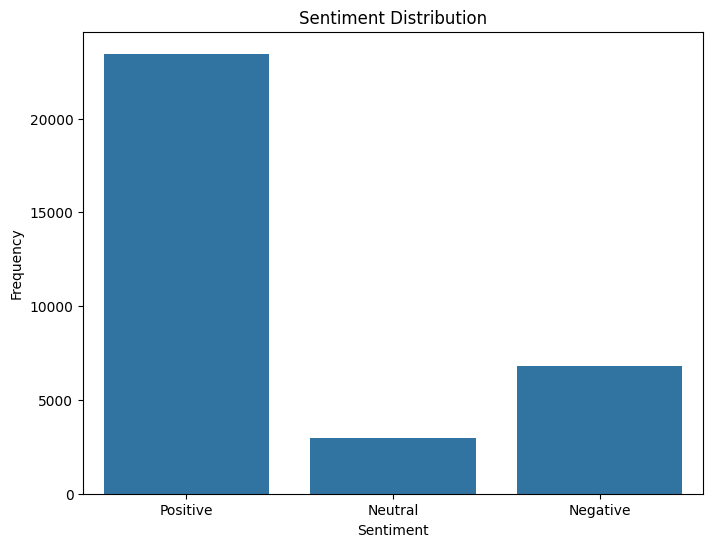

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df1, x='sentiment', order=['Positive', 'Neutral', 'Negative'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show();

In [ ]:
# Grouping by Category to see sentiment counts per category
category_sentiment = df1.groupby('Category')['sentiment'].value_counts(normalize=True).unstack()
print(category_sentiment)

sentiment         Negative   Neutral  Positive
Category                                      
Accessories       0.173535  0.076611  0.749855
Baby products     0.151976  0.087470  0.760554
Computing         0.211488  0.070606  0.717907
Fashion           0.219785  0.096452  0.683763
Phones & tablets  0.192462  0.102000  0.705538
Radios            0.323529  0.058824  0.617647
Speakers          0.248941  0.088983  0.662076
Televisions       0.199052  0.052133  0.748815
appliances        0.218843  0.057864  0.723294
home products     0.266744  0.099592  0.633663
office products   0.190865  0.083197  0.725938
other_categories  0.188427  0.097923  0.713650
sporting_goods    0.167568  0.098198  0.734234


#### *Sentiment by Category*

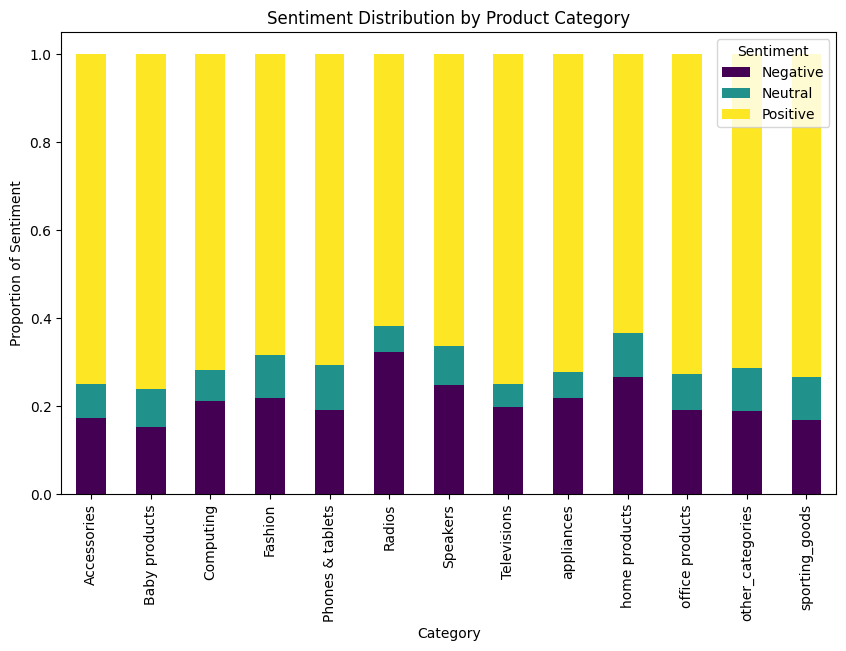

In [ ]:
# Stacked bar chart for sentiment by category
category_sentiment.plot(kind='bar', stacked=True, figsize=(10, 6), colormap="viridis")
plt.title("Sentiment Distribution by Product Category")
plt.xlabel("Category")
plt.ylabel("Proportion of Sentiment")
plt.legend(title="Sentiment")
plt.show();

In [ ]:
df1.head()

,product_name,price,brand,review,ratings,user_name,Category,sub_category,sentiment
1,"9""-17"" Laptop Cooling Stand Pad",3325.0,Unknown,"Working, feels cheap",3.0,WILFRED,Computing,computer-accessories,Neutral
2,"9""-17"" Laptop Cooling Stand Pad",3325.0,Unknown,A bit big for a regular laptop bag... The fanc...,4.0,Michael,Computing,computer-accessories,Positive
29,Toshiba High Speed Micro SD Memory Card,803.0,Toshiba,genuine,4.0,your name,Computing,computer-accessories,Positive
30,Lenovo Laptop Charger For Lenovo ThinkPad Yoga...,4157.0,Lenovo,It worked out well,1.0,Bathsheba,Computing,computer-accessories,Negative
37,"Safaricom, Airtel & Telkom -4G/3G Universal Modem",2600.0,Unknown,So far so good...,5.0,Ngarachu,Computing,computer-accessories,Positive


In [ ]:
df2 = df1[['review', 'sentiment']]

df2.head()

,review,sentiment
1,"Working, feels cheap",Neutral
2,A bit big for a regular laptop bag... The fanc...,Positive
29,genuine,Positive
30,It worked out well,Negative
37,So far so good...,Positive


In [ ]:
review = df2['review']

In [ ]:
# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Define the cleaning function
def clean_review(review):
    # Check if the review is a string (prevent errors)
    if not isinstance(review, str):
        return ""

    # Convert to lowercase
    review_lower = review.lower()

    # Remove URLs
    review_no_url = re.sub(r'http\S+|www\S+|https\S+', '', review_lower, flags=re.MULTILINE)

    # Remove mentions (@username)
    review_no_mention = re.sub(r'@\w+', '', review_no_url)

    # Remove hashtags (#topic)
    review_no_hashtag = re.sub(r'#\w+', '', review_no_mention)

    # Remove punctuation
    review_no_punc = re.sub(r'[^\w\s]', '', review_no_hashtag)

    # Remove numbers
    review_no_num = re.sub(r'\d+', '', review_no_punc)

    # Remove extra whitespace
    review_no_space = ' '.join(review_no_num.split())

    # Tokenization
    tokens = word_tokenize(review_no_space) if review_no_space.strip() else []

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Concatenate tokens back into a sentence
    cleaned_review = ' '.join(lemmatized_tokens)

    return cleaned_review

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# Apply the clean_review function to each element in the 'review' column of the DataFrame
df2['cleaned_review'] = df2['review'].apply(clean_review)

LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [ ]:
df2.head()

Dropping the uncleaned `review` column

In [ ]:
df2.drop(columns='review', axis=1, inplace=True)

df2.head()

Statistical summary

In [ ]:
df2.describe()

#### *WordCount for Positive Sentiments*

In [ ]:
def plot_sentiment_wordcloud(df, sentiment, sentiment_column='sentiment', review_column='cleaned_review'):
    """
    Plots the word cloud for a specific sentiment.
    """
    # Join all reviews of the current sentiment into one string
    sentiment_text = " ".join(df[df[sentiment_column].str.lower() == sentiment.lower()][review_column])

    # Generate word cloud for the sentiment
    wordcloud = WordCloud(height=400, width=800, max_words=50, background_color="white").generate(sentiment_text)

    # Plot the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(f"{sentiment} Reviews")
    plt.axis("off")
    plt.show();

In [ ]:
plot_sentiment_wordcloud(df2, sentiment="Positive")

#### *WordCount for Negative Sentiments*

In [ ]:
plot_sentiment_wordcloud(df2, sentiment="Negative")

#### *WordCount for Neutral Sentiments*

In [ ]:
plot_sentiment_wordcloud(df2, sentiment="Neutral")

#### *Split the Dataset*

In [ ]:
X = df2["cleaned_review"]
y = df2["sentiment"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state = 42,
                                                    shuffle = True,
                                                    test_size = 0.2)

#### *BOW*

In [ ]:
# Define the pipeline with CountVectorizer and LogisticRegression
pipeline = Pipeline([
    ('vectorizer', CountVectorizer(
        tokenizer=word_tokenize,
        stop_words=nltk.corpus.stopwords.words("english"),
        ngram_range=(1, 1)
    )),
    ('classifier', LogisticRegression(
        max_iter=200,
        class_weight='balanced'
    ))
])

In [ ]:
# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict on the test data
pred = pipeline.predict(X_test)

In [ ]:
print(classification_report(pred,y_test))

In [ ]:
print(ConfusionMatrixDisplay.from_predictions(pred,y_test));

#### Testing BOW Model

In [ ]:
def predict_sentiment(sentences, model):
    try:
        # Clean the input sentences
        processed_sentences = [clean_review(sentence) for sentence in sentences]

        # Use the entire pipeline to transform and predict
        predictions = model.predict(processed_sentences)

        return predictions

    except NotFittedError as e:
        print(f"Error: {e}. Ensure that the pipeline is fitted on training data before using it for predictions.")

In [ ]:
# Example of model uage
new_sentences = ["This product is super cool.",
                 "Not good"]
new_predictions = predict_sentiment(new_sentences, pipeline)

print("Predictions:", new_predictions)

#### *TF-IDF*

In [ ]:
# Define the pipeline as pipeline1
pipeline1 = Pipeline([
    ('tfidf', TfidfVectorizer(
        analyzer='word',
        stop_words=nltk.corpus.stopwords.words("english")
    )),
    ('classifier', LogisticRegression(
        max_iter=200,
        class_weight='balanced'
    ))
])

In [ ]:
# Fit the pipeline on the training data
pipeline1.fit(X_train, y_train)

# Predict on the test data
pred = pipeline1.predict(X_test)

In [ ]:
print(classification_report(pred,y_test))

In [ ]:
print(ConfusionMatrixDisplay.from_predictions(pred,y_test))

#### Testing TF-IDF Model

In [ ]:
# Example of model uage
new_sentences = ["This product is super cool.",
                 "returning"]
new_predictions = predict_sentiment(new_sentences, pipeline1)

print("Predictions:", new_predictions)

#### *SVM Model analysis*

In [ ]:
# Define the pipeline
svm_pipe = Pipeline([
    ('tfidf', TfidfVectorizer()),        # Feature extraction step
    ('svm', SVC(kernel='linear'))        # SVM classifier with a linear kernel
])

In [ ]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train the pipeline
svm_pipe.fit(X_train, y_train)

In [ ]:
# Predict on the test set
y_pred = svm_pipe.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

In [ ]:
print(ConfusionMatrixDisplay.from_predictions(y_pred,y_test))

#### Testing SVM Model

In [ ]:
# Example of model uage
new_sentences = ["This product is super cool.",
                 "returning"]
new_predictions = predict_sentiment(new_sentences, pipeline1)

print("Predictions:", new_predictions)

#### *Naive Bayes classifier*

In [ ]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Vectorize the training and test data
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train the Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)

In [ ]:
# Make predictions on the test set
y_pred = nb_model.predict(X_test_vec)

# Evaluate the model
print(classification_report(y_test, y_pred))

In [ ]:
print(ConfusionMatrixDisplay.from_predictions(y_pred, y_test))

#### Testing Naive Bayes Model

In [ ]:
def predict_sentiment(sentences, vectorizer, model):
    try:
        # Clean the input sentences
        processed_sentences = [clean_review(sentence) for sentence in sentences]

        # Transform the sentences using the vectorizer
        X = vectorizer.transform(processed_sentences)
        # Predict sentiment
        predictions = model.predict(X)

        return predictions

    except NotFittedError as e:
        print(f"Error: {e}. Ensure that the vectorizer and model are both fitted.")

In [ ]:
# Example usage
new_sentences = ["This product is super cool.",
                 "I hate it"]
new_predictions = predict_sentiment(new_sentences, vectorizer, nb_model)

print("Predictions:", new_predictions)

#### *Random Forest Classifier*

In [ ]:
# Feature extraction
vectorizer1 = TfidfVectorizer()
X_fit = vectorizer1.fit_transform(X)

In [ ]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_fit, y, test_size=0.2, random_state=42)

In [ ]:
# Build and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

In [ ]:
# Evaluate the model
y_pred = rf_model.predict(X_test)

print(classification_report(y_test, y_pred))

In [ ]:
print(ConfusionMatrixDisplay.from_predictions(y_pred, y_test))

#### Testing RF Model

In [ ]:
# Example usage
new_sentences = ["This product is super cool.",
                 "not pleased"]
new_predictions = predict_sentiment(new_sentences, vectorizer1, rf_model)

print("Predictions:", new_predictions)

## Recommendation system
***
A recommendation system allows predicting the future preference list for a certain customer or user, and recommends the top preference for this user. In this project, we'll recommend products a user is likely to be from an e-commerce site.

### 1. Unpersonalized Recommendations

* Unpersonalized Recommendations focuses on identifying popular items across a large user base rather than personalizing recommendations for individual users. In an e-commerce setting, demographic filtering can recommend products based on general popularity and positive feedback from the broader user community. This approach is often simpler, and will leverage metrics like overall ratings, ratings count, and price to identify top products.
* This technique is also useful in addressing the `cold start` problem in recommendation systems. We'll initially recommend popular products or trending items until sufficient user-item interaction data is available. New products with specific characteristics (like low price or a specific brand) can be recommended if those attributes align with popular items.



#### Weighted Rating Formula

* We'll create a Weighted Rating function, which takes into account both the average rating of each item and the number of ratings.

In [ ]:
# Drop duplicate product and only get the overall rating and rating count for each product.
df3 = df.drop_duplicates(subset=['product_name'], keep='first')

df3.shape

In [ ]:
# Compute Weighted Rating

ratings_mean = df3['overall_ratings'].mean()  # Mean of overall ratings across all products

min_ratings_count = df3['ratings_count'].quantile(0.70)  # Minimum ratings count threshold (70th percentile)
# Function to calculate weighted rating
def weighted_rating(x, m=ratings_mean, C=min_ratings_count):
    v = x['ratings_count']
    R = x['overall_ratings']
    return (v / (v + m) * R) + (m / (m + v) * C)

# Filter out products with sufficient ratings (above threshold)
qualified_data = df3[df3['ratings_count'] >= min_ratings_count].copy()

# Calculate weighted score
qualified_data['score'] = qualified_data.apply(weighted_rating, axis=1)

# Sort products based on the score
top_rated_products = qualified_data.sort_values('score', ascending=False)

* Products with the highest weighted rating.

In [ ]:
# Analyzing products with the highest weighted rating.
plt.figure(figsize=(10, 6))
top_10_rated = top_rated_products.head(10)
sns.barplot(x=top_10_rated['score'], y=top_10_rated['product_name'], palette='viridis')
plt.title('Top 10 Rated Products')
plt.xlabel('Weighted Rating')
plt.ylabel('Product')
plt.show();

* Categories with the highest weighted rating.

In [ ]:
# Calculate the weighted rating for each category
subcategory_overall_ratings = qualified_data.groupby('Category')['score'].mean()

# Sort the categories by weighted rating and get the top 10
ratings = category_average_ratings.sort_values(ascending=False).head(10)
# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x=ratings.values, y=ratings.index, palette='viridis')
plt.title('Top 10 Categories by Weighted Rating')
plt.xlabel('Weighted Rating')
plt.ylabel('Category')
plt.show();

### 2. Personalized Recommendations

* Personalized Recommendations can be summarized as: Given the profile of the `active` user and possibly some situational context, i.e. user browsing a product or making a purchase, creating a set of items, and a score for each recommendable item in that set.
Personalized Recommendations are grouped as shown below:

i. Collaborative Filtering: **
* `User-Based:` Recommends items based on similar users’ preferences.

* `Item-Based:` Recommends items similar to those the user has liked in the past.

ii. Content-Based Filtering: **
* Uses item metadata (e.g., product descriptions, tags) to recommend similar items to those the user has previously liked.

3. Hybrid Methods:
* Combines multiple approaches to improve performance and address the limitations of individual methods.

In [ ]:
df.columns

#### i) Collaborative Filtering

* Collaborative filtering can be implemented using user-based or item-based techniques. A common method in collaborative filtering is to use matrix factorization, such as Singular Value Decomposition (SVD), which is effective for predicting ratings based on past user interactions.

1. Item based

In [ ]:
ratings_matrix = df.pivot_table(index='product_name', columns='user_name', values='ratings').fillna(0)

In [ ]:
# Initialize Truncated SVD
svd = TruncatedSVD(n_components=50, random_state=42)  # Adjust components as necessary

# Fit and transform the ratings matrix
latent_matrix = svd.fit_transform(ratings_matrix)

# Compute cosine similarity on the reduced matrix
similarity_matrix = cosine_similarity(latent_matrix)
similarity_df = pd.DataFrame(similarity_matrix, index=ratings_matrix.index, columns=ratings_matrix.index)

In [ ]:
# Recommendation function using similarity matrix from SVD
def recommend_items(product_name, num_recommendations=5):
    # Check if the product exists in the similarity matrix
    if product_name not in similarity_df.index:
        print(f"Product '{product_name}' not found in the dataset.")
        return []

    # Retrieve similarity scores for the specified product
    sim_scores = similarity_df[product_name]

    # Sort scores in descending order and exclude the product itself
    sim_scores = sim_scores.sort_values(ascending=False).drop(product_name)

    # Get the top recommendations
    top_items = sim_scores.head(num_recommendations).index
    top_scores = sim_scores.head(num_recommendations).values

    recommendations = list(zip(top_items, top_scores))
    return recommendations

Testing and Evaluation

In [ ]:
# Function to display recommendations
def display_recommendations(product_name, data, num_recommendations=5):
    # Get the list of recommended items with similarity scores
    recommendations = recommend_items(product_name, num_recommendations)

    # Print the original product for context
    print(f"Recommendations for '{product_name}':\n")

    # Loop through the recommendations and display details from the dataset
    for rec, score in recommendations:
        # Filter the dataset to get details of the recommended item
        rec_data = data[data['product_name'] == rec]

        if not rec_data.empty:
            print(f"Product Name: {rec_data['product_name'].values[0]}")
            print(f"Category: {rec_data['Category'].values[0]}")
            print(f"Ratings: {rec_data['overall_ratings'].values[0]}")
            print(f"Price: {rec_data['price'].values[0]}")
            print(f"Similarity Score: {score:.2f}")
            print("—" * 20)
        else:
            print(f"Details for '{rec}' not found in dataset.")


In [ ]:
# Test the recommendation function
display_recommendations('1.2M Computer Office Desk Workstation With Metal Frame (Unassembled)', df, num_recommendations=5)

2. User based

In [ ]:
user_item_matrix = df.pivot_table(index='user_name', columns='product_name', values='ratings').fillna(0)

In [ ]:
# Initialize Truncated SVD
n_components = 20  # Number of latent features, can be tuned
svd = TruncatedSVD(n_components=n_components, random_state=42)

# Fit and transform the user-item matrix
user_item_svd_matrix = svd.fit_transform(user_item_matrix)

# Convert the transformed data to a DataFrame
svd_df = pd.DataFrame(user_item_svd_matrix, index=user_item_matrix.index)


In [ ]:
# Compute cosine similarity between users
user_similarity_matrix = cosine_similarity(svd_df)
user_similarity_df = pd.DataFrame(user_similarity_matrix, index=user_item_matrix.index, columns=user_item_matrix.index)

In [ ]:
#Recommendation function
def recommend_items(user_name, num_recommendations=5):
    # Check if the user exists in the similarity DataFrame
    if user_name not in user_similarity_df.columns:
        print(f"User '{user_name}' not found.")
        return []

    # Find similar users to the given user
    similar_users = user_similarity_df[user_name].sort_values(ascending=False).index[1:]  # Exclude the user themselves

    # Initialize a dictionary to hold potential recommendations and their weighted scores
    recommendations = {}

    # Iterate over similar users
    for sim_user in similar_users:
        user_ratings = user_item_matrix.loc[sim_user]

        # Weight each item by similarity score and accumulate in recommendations dictionary
        for item, rating in user_ratings.items():
            if rating > 0:  # Assuming 0 indicates no rating
                recommendations[item] = recommendations.get(item, 0) + rating * user_similarity_df.loc[sim_user, user_name]

    # Sort recommendations by weighted score
    sorted_recommendations = sorted(recommendations.items(), key=lambda x: x[1], reverse=True)

    # Return top recommendations
    top_recommendations = [item for item, score in sorted_recommendations[:num_recommendations]]
    return top_recommendations

Testing and Evaluation

In [ ]:
# Recommendation display function
def display_user_recommendations(user_name, data, num_recommendations=5):
    # Get the list of recommended items for the user
    recommendations = recommend_items(user_name, num_recommendations)

    # Print the original user for context
    print(f"Recommendations for User '{user_name}':\n")

    # Loop through the recommendations and display details from the dataset
    for rec in recommendations:
        # Filter the dataset to get details of the recommended item
        rec_data = data[data['product_name'] == rec]

        if not rec_data.empty:
            print(f"Product Name: {rec_data['product_name'].values[0]}")
            print(f"Category: {rec_data['Category'].values[0]}")
            print(f"Ratings: {rec_data['overall_ratings'].values[0]}")
            print(f"Price: {rec_data['price'].values[0]}")
            print("—" * 20)
        else:
            print(f"Details for '{rec}' not found in dataset.")


In [ ]:
unique_user_names = df['user_name'].unique()

# Display the user names
print("Unique User Names in Dataset:")
print(unique_user_names)

In [ ]:
user_name_to_test = 'Antonia'
display_user_recommendations(user_name_to_test, df)

#### ii) Content-Based Filtering
*  Content-based filtering focuses on recommending items similar to those a user has liked in the past, using attributes or features of the items themselves rather than relying on user interactions. Each item is analyzed based on its characteristics (e.g., genre, keywords, product features), and recommendations are made based on matching these features.

In [ ]:
# Combine the features
df['combined_features'] = (df['product_name'].fillna('') +
    df['brand'].fillna('') +
    df['review_title'].fillna('') +
    df['review'].fillna('')
)

In [ ]:
# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['combined_features'])

In [ ]:
# Set the number of latent features (e.g., 50)
n_components = 50

# Initialize and apply TruncatedSVD
svd = TruncatedSVD(n_components=n_components, random_state=42)
item_features_matrix = svd.fit_transform(tfidf_matrix)

In [ ]:
# Calculate cosine similarity on the SVD-transformed matrix
cosine_sim = cosine_similarity(item_features_matrix)
# Convert to DataFrame for ease of use
cosine_sim_df = pd.DataFrame(cosine_sim, index=df['product_name'], columns=df['product_name'])

In [ ]:
# Build a recommendation Function
def recommend_items(product_name, num_recommendations=5):
    # Check if the product exists in the similarity DataFrame
    if product_name not in cosine_sim_df.columns:
        print(f"Product '{product_name}' not found in dataset.")
        return []

    # Get similarity scores for the product and sort by descending order
    sim_scores = cosine_sim_df[product_name].sort_values(ascending=False)

    # Exclude the product itself from recommendations
    sim_scores = sim_scores.drop(product_name)

    # Get the top recommendations based on similarity scores
    top_recommendations = sim_scores.head(num_recommendations).index.tolist()

    return top_recommendations

Testing and Evaluation

In [ ]:
# Recommendation display function
def display_recommendations(product_name, data, num_recommendations=5):
    # Get the list of recommended items
    recommendations = recommend_items(product_name, num_recommendations)

    # Print the original product for context
    print(f"Recommendations for '{product_name}':\n")

    # Loop through the recommendations and display details from the dataset
    for rec in recommendations:
        # Filter the dataset to get details of the recommended item
        rec_data = data[data['product_name'] == rec]

        if not rec_data.empty:
            print(f"Product Name: {rec_data['product_name'].values[0]}")
            print(f"Category: {rec_data['Category'].values[0]}")
            print(f"Ratings: {rec_data['overall_ratings'].values[0]}")
            print(f"Price: {rec_data['price'].values[0]}")
            print("—" * 20)
        else:
            print(f"Details for '{rec}' not found in dataset.")

In [ ]:
# Example with a product name
display_recommendations('tenda 300 Mbps Wireless WiFi Easy Setup Router', df)

In [ ]:
# Calculate content-based similarity score
def similarity_score_recommendations(product_name, cosine_sim_df, num_recommendations=5):
    if product_name not in cosine_sim_df.columns:
        print(f"Product '{product_name}' not found in dataset.")
        return

    # Get similarity scores for the product and sort by descending order
    sim_scores = cosine_sim_df[product_name].sort_values(ascending=False)
    sim_scores = sim_scores.drop(product_name)  # Drop the input product itself

    # Print the similarity scores for each recommended item
    print(f"Similarity scores for recommendations for '{product_name}':")
    for i, (rec, score) in enumerate(sim_scores.head(num_recommendations).items(), 1):
        print(f"{i}. {rec} - Similarity Score: {score:.2f}")

In [ ]:
similarity_score_recommendations('tenda 300 Mbps Wireless WiFi Easy Setup Router', cosine_sim_df)